In [ ]:
# https://medium.com/@cdabakoglu/time-series-forecasting-arima-lstm-prophet-with-python-e73a750a9887

In [10]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import DataFrame
    
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


# 날짜 데이터 생성
from datetime import datetime

# 선형 회귀분석 (절편(intercept) 추가)
import statsmodels.api as sm
# 자기상관 함수, 부분 자기상관 함수
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
# ARIMA
from statsmodels.tsa.arima_model import ARIMA
matplotlib.rc("font", family = "Malgun Gothic")


In [11]:
import numpy as np
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf 
from statsmodels.tsa.seasonal import seasonal_decompose 
from pmdarima import auto_arima                        
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse
import warnings
warnings.filterwarnings("ignore")
matplotlib.rc("font", family = "Malgun Gothic")


In [12]:
df_raw = pd.read_csv("Card_Spanding_cl5.csv", encoding='utf-8-sig', parse_dates = ["사용일자"])

In [780]:
#df_raw_some = df_raw[(df_raw["사용카드"] == 219) & (df_raw["age_group"]== 2) & (df_raw["성별"]== "남성") & (df_raw["소비처업종"]== "유통업")].groupby(["사용일자"])["사용금액"].sum()

In [669]:
#df_raw_some = df_raw[(df_raw["사용카드"] == 216) & (df_raw["age_group"]== 2) & (df_raw["성별"]== "남성")].groupby(["사용일자"])["사용금액"].sum()
#df_raw_some.head()

사용일자
2018-04-03    4274
2018-04-05    7132
2018-04-06     245
2018-04-07    5294
2018-04-08    6689
Name: 사용금액, dtype: int64

In [986]:
#df_raw_some = df_raw[(df_raw["사용카드"] == 218) & (df_raw["age_group"]== 2) & (df_raw["성별"]== "남성")].groupby(["사용일자"])["사용금액"].sum()
#df_raw_some.head()

사용일자
2018-04-01     258
2018-04-03    4512
2018-04-04    1154
2018-04-06    2031
2018-04-08      32
Name: 사용금액, dtype: int64

In [963]:
#df_raw_some = df_raw[(df_raw["사용카드"] == 217) & (df_raw["age_group"]== 2) & (df_raw["성별"]== "남성")].groupby(["사용일자"])["사용금액"].sum()
#df_raw_some.head()

사용일자
2018-04-02    11489
2018-04-03      834
2018-04-04      140
2018-04-06      595
2018-04-07     1104
Name: 사용금액, dtype: int64

In [13]:
df_raw_some = df_raw[(df_raw["사용카드"] == 218) & (df_raw["age_group"]== 2) ].groupby(["사용일자"])["사용금액"].sum()
print(len(df_raw_some))
df_raw_some.head()

291


사용일자
2018-04-01    3188
2018-04-02    2433
2018-04-03    4615
2018-04-04    1154
2018-04-05     856
Name: 사용금액, dtype: int64

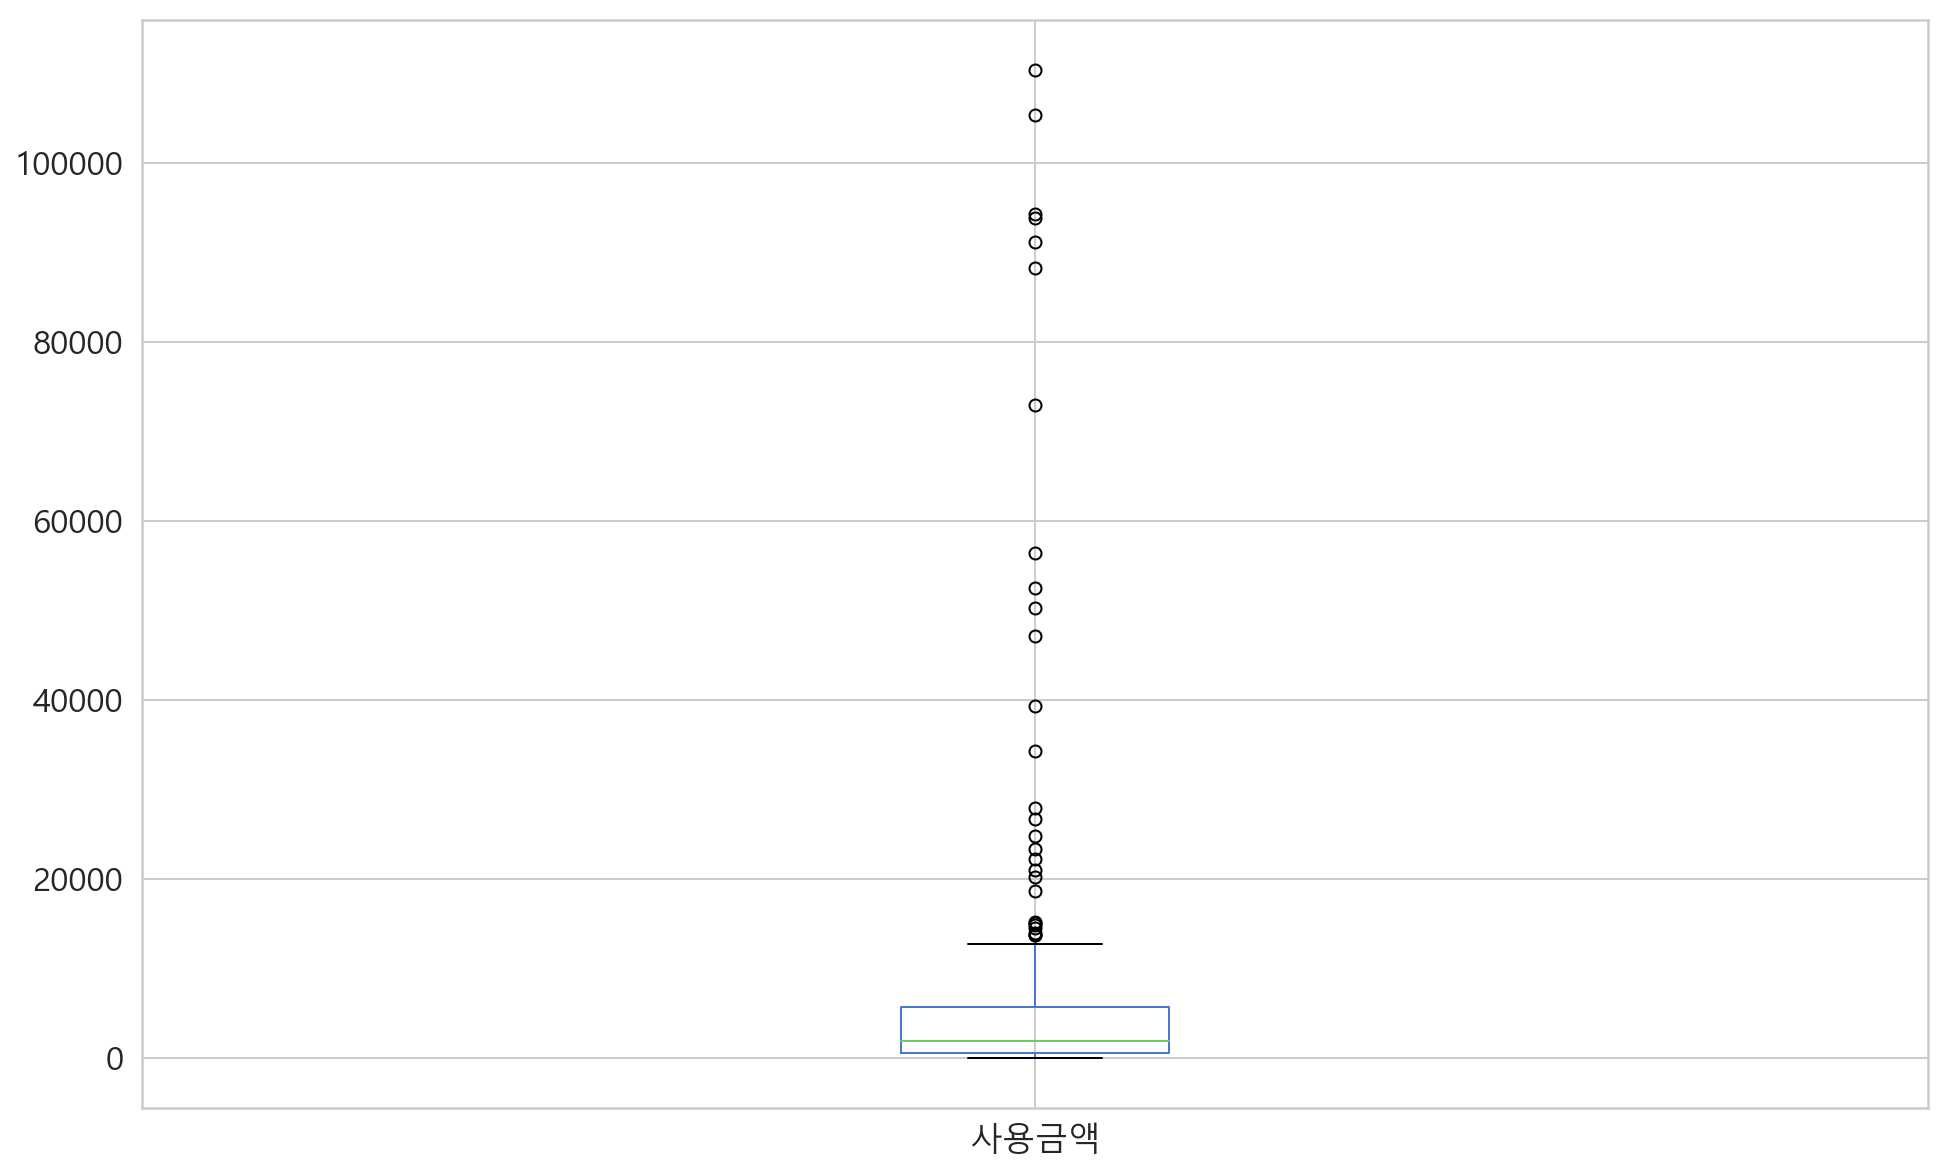

In [1156]:
df_raw_some = pd.DataFrame(df_raw_some)
df_raw_some.boxplot()

In [14]:
df = df_raw_some
df.describe()

count       291.000000
mean       6780.525773
std       15862.920430
min          32.000000
25%         597.500000
50%        1919.000000
75%        5729.000000
max      110459.000000
Name: 사용금액, dtype: float64

In [16]:
df.to_csv("data2.csv")

In [17]:
df = pd.read_csv('data.csv')
df.head()

,2018-04-01,3188
0,2018-04-02,2433
1,2018-04-03,4615
2,2018-04-04,1154
3,2018-04-05,856
4,2018-04-06,2485


In [1181]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 291 entries, 0 to 290
Data columns (total 2 columns):
month       291 non-null object
spending    291 non-null int64
dtypes: int64(1), object(1)
memory usage: 4.6+ KB


In [1183]:
df.month = pd.to_datetime(df.month)
df = df.set_index("month")
df.head()

,spending
month,
2018-04-01,3188
2018-04-02,2433
2018-04-03,4615
2018-04-04,1154
2018-04-05,856


In [1185]:
pd.infer_freq

<function pandas.tseries.frequencies.infer_freq(index, warn=True)>

In [1187]:
pd.tseries.frequencies.to_offset

<function pandas.tseries.frequencies.to_offset(freq)>

In [1119]:
df["사용금액"] = df.사용금액.clip_upper(2000) # 최대값은 10000으로 설정, 모형의 정확성과 (큰값보다는 작은 값을 맞추는 것에 집중)

In [1053]:
#df["사용금액"] = df.사용금액.map(lambda x : (x - df.사용금액.mean()) / np.std(df.사용금액))

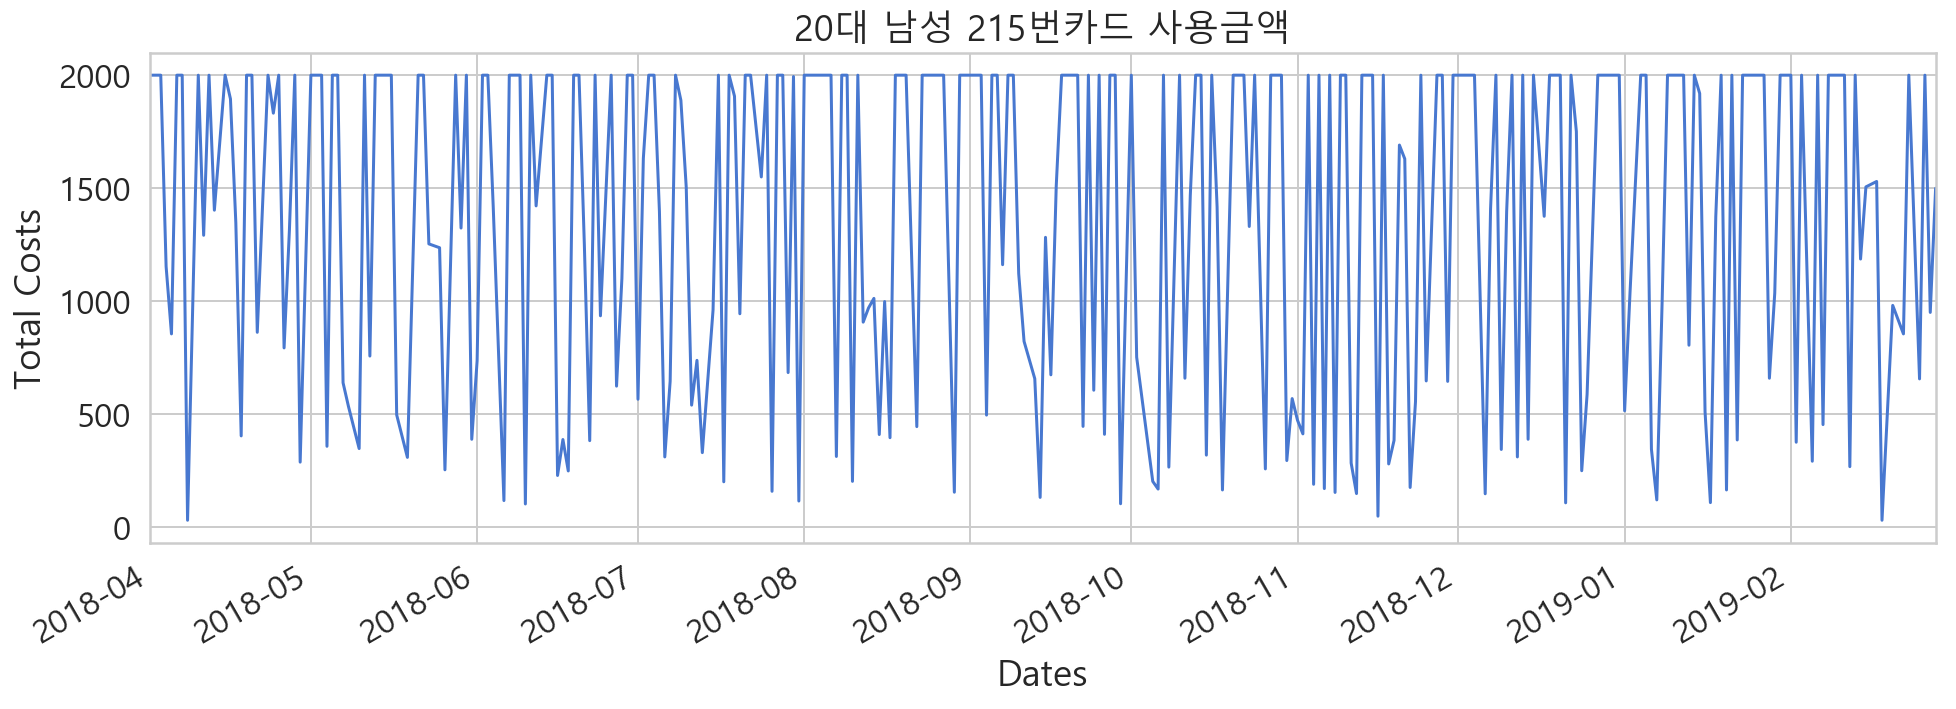

In [1120]:
# df.index.freq = 'MS'
ax = df['사용금액'].plot(figsize = (16,5), title = "20대 남성 215번카드 사용금액")
ax.set(xlabel='Dates', ylabel='Total Costs');

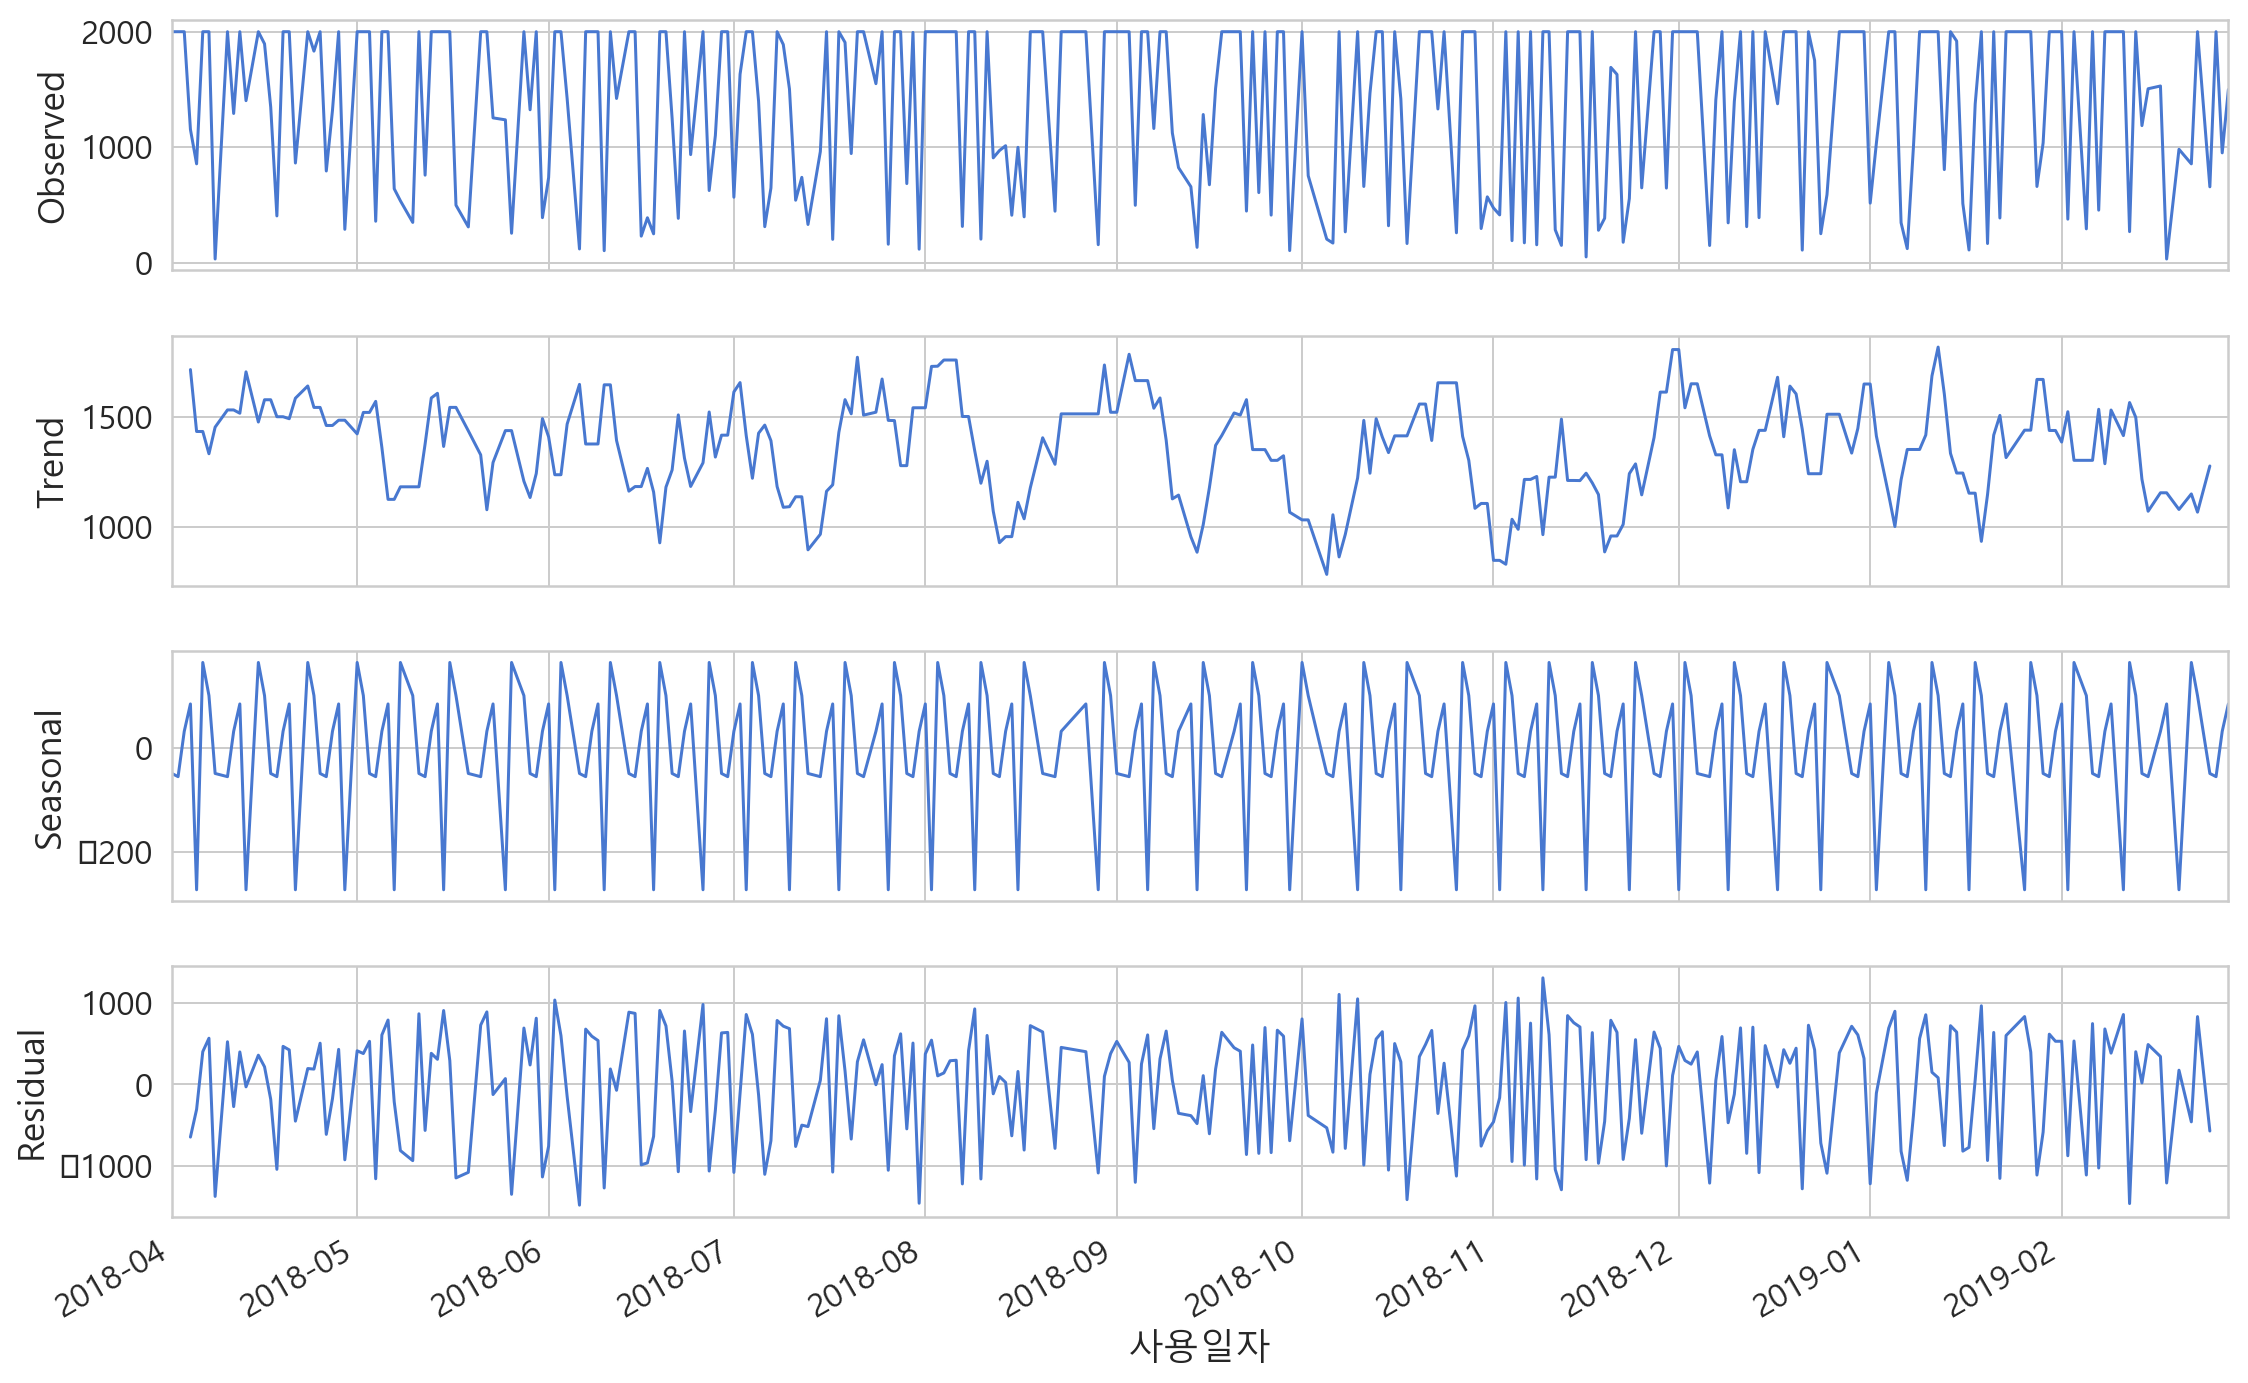

In [1121]:
a = seasonal_decompose(df["사용금액"], model = "add", freq = 7)
a.plot();

# ARIMA Forecast

In [1122]:
auto_arima(df['사용금액'], seasonal=True, m=12,max_p=7, max_d=5,max_q=7, max_P=4, max_D=4,max_Q=4).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  291
Model:             SARIMAX(0, 0, 1)x(0, 0, 2, 12)   Log Likelihood               -2324.782
Date:                            Sat, 02 May 2020   AIC                           4659.563
Time:                                    21:03:55   BIC                           4677.930
Sample:                                         0   HQIC                          4666.921
                                            - 291                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   1363.2288     45.918     29.688      0.000    1273.231    1453.226
ma.L1         -0.1784      0.065     -2.754      0.006      -0.305      -0.051
ma.S.L12      -0.1103      0.063     -1.749      0.080      -0.234       0.013
ma.S.L24       0.1041      0.064      1.632      0.103      -0.021       0.229
sigma2      5.077e+05   9.99e+04      5.081      0.000    3.12e+05    7.04e+05
===================================================================================
Ljung-Box (Q):                       39.96   Jarque-Bera (JB):                31.94
Prob(Q):                              0.47   Prob(JB):                         0.00
Heteroskedasticity (H):               1.20   Skew:                            -0.48
Prob(H) (two-sided):                  0.38   Kurtosis:                         1.70
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [1123]:
train_data = df[:len(df)-12]
test_data = df[len(df)-12:]
arima_model = SARIMAX(train_data['사용금액'], order = (2,1,1), seasonal_order = (4,0,3,12))
arima_result = arima_model.fit()
arima_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                               사용금액   No. Observations:                  279
Model:             SARIMAX(2, 1, 1)x(4, 0, 3, 12)   Log Likelihood               -2229.185
Date:                            Sat, 02 May 2020   AIC                           4480.371
Time:                                    21:04:12   BIC                           4520.275
Sample:                                         0   HQIC                          4496.380
                                            - 279                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1501      0.091     -1.655      0.098      -0.328       0.028
ar.L2         -0.0851      0.086     -0.989      0.322      -0.254       0.083
ma.L1         -0.9950      0.034    -28.982      0.000      -1.062      -0.928
ar.S.L12       0.3695      0.692      0.534      0.593      -0.987       1.725
ar.S.L24      -0.1550      0.511     -0.303      0.762      -1.157       0.847
ar.S.L36       0.6100      0.546      1.117      0.264      -0.460       1.680
ar.S.L48       0.0331      0.167      0.198      0.843      -0.294       0.360
ma.S.L12      -0.4879      0.707     -0.690      0.490      -1.874       0.898
ma.S.L24       0.3267      0.499      0.655      0.512      -0.651       1.304
ma.S.L36      -0.7418      0.593     -1.250      0.211      -1.905       0.421
sigma2      6.927e+05   1.27e+05      5.444      0.000    4.43e+05    9.42e+05
===================================================================================
Ljung-Box (Q):                       32.73   Jarque-Bera (JB):                29.10
Prob(Q):                              0.79   Prob(JB):                         0.00
Heteroskedasticity (H):               1.34   Skew:                            -0.43
Prob(H) (two-sided):                  0.16   Kurtosis:                         1.67
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [1124]:
arima_pred = arima_result.predict(start = len(train_data), end = len(df)-1, typ="levels").rename("ARIMA Predictions")
arima_pred

279    1226.613708
280    1444.612767
281    1105.559288
282    1612.600220
283    1309.437304
284    1681.704970
285    1112.783977
286    1518.607333
287    1408.601991
288    1293.418068
289    1280.636189
290    1638.115018
Name: ARIMA Predictions, dtype: float64

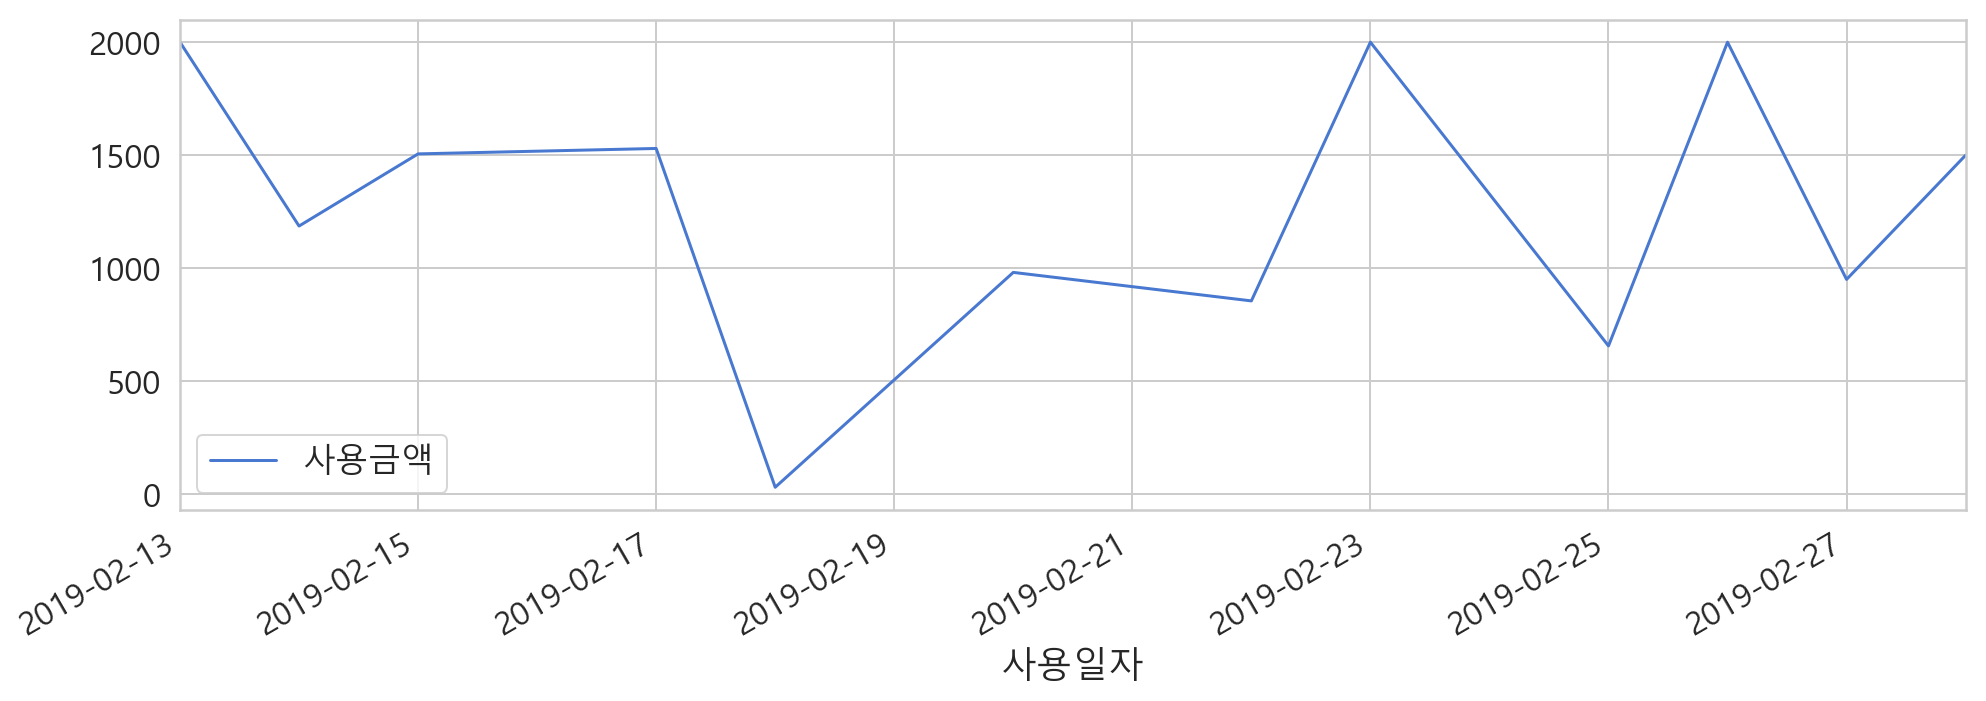

In [1125]:
test_data['사용금액'].plot(figsize = (16,5), legend=True)

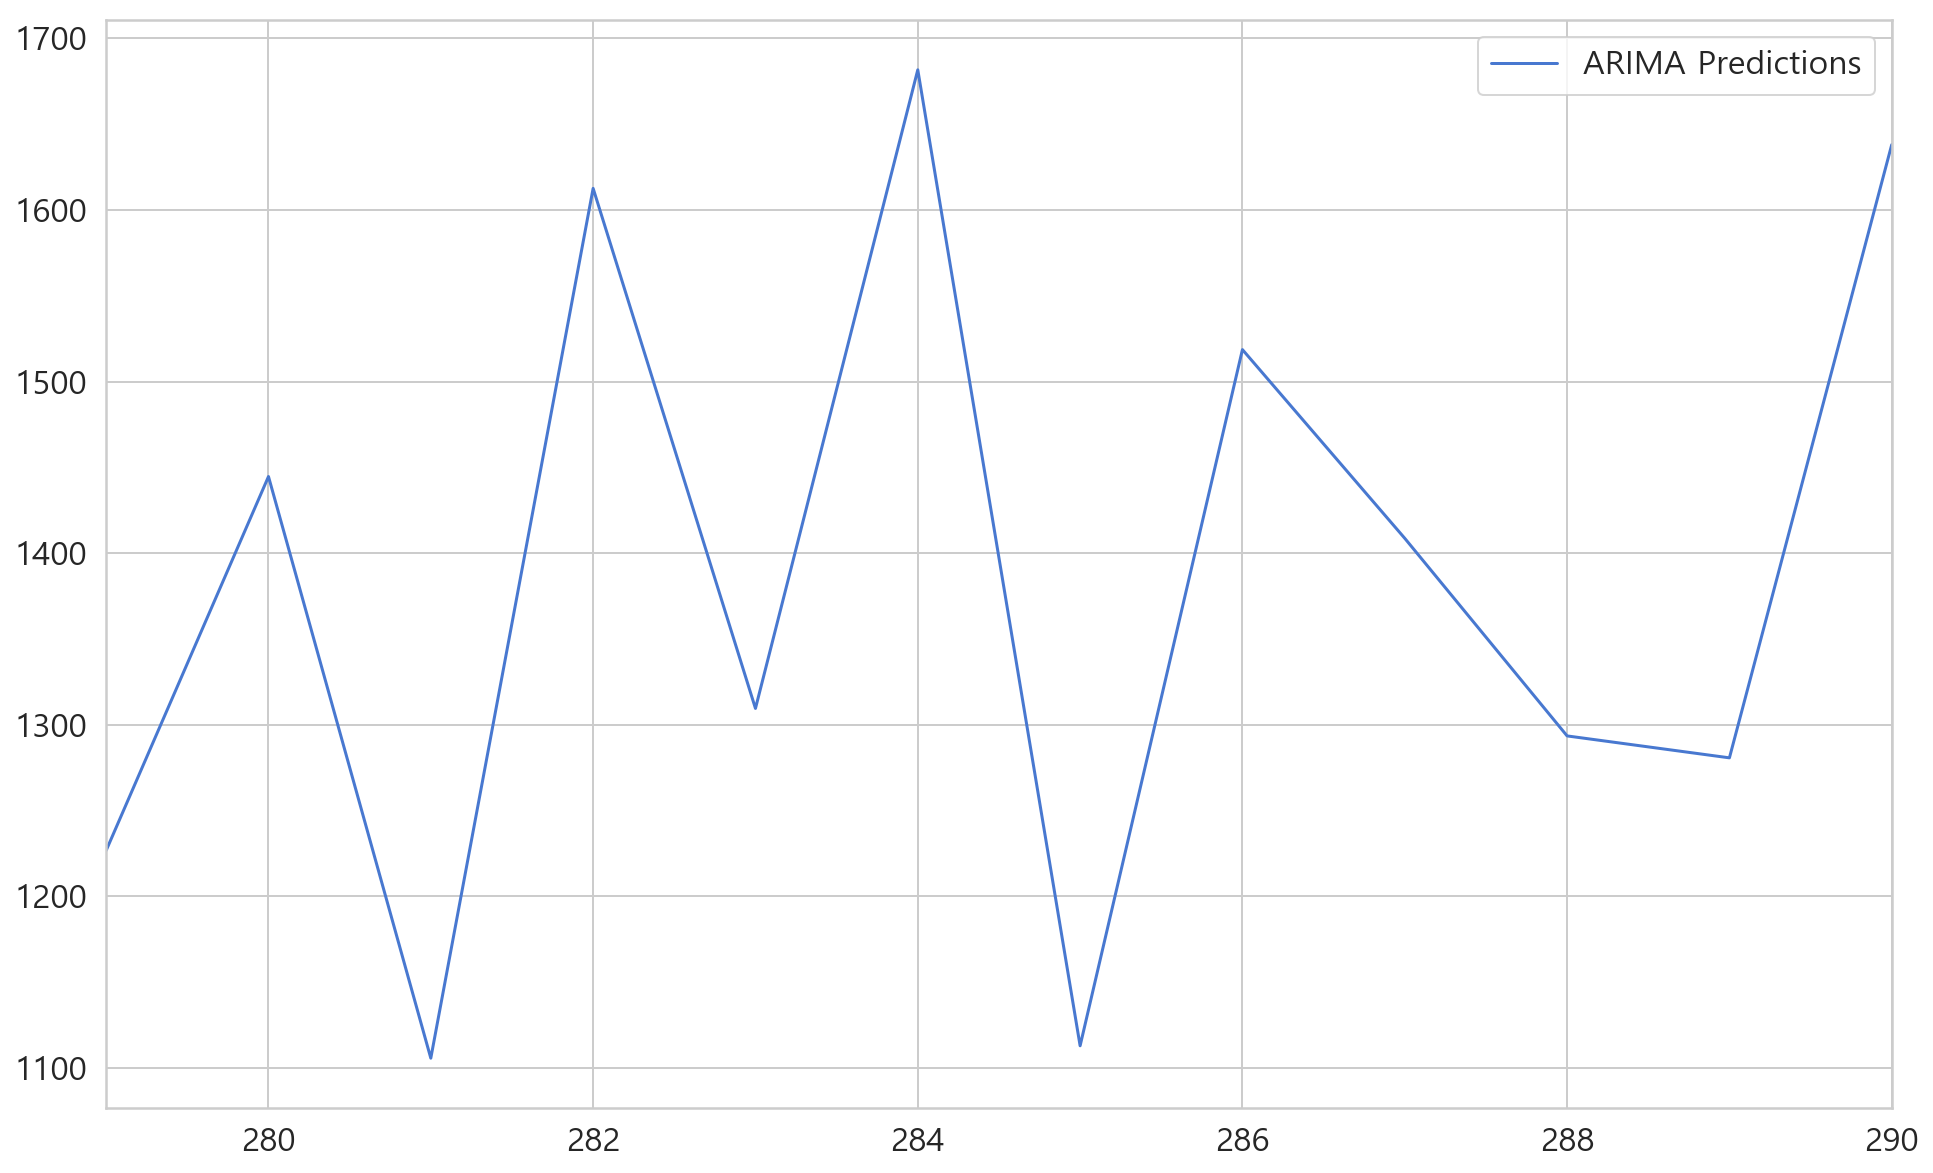

In [1126]:
arima_pred.plot(legend = True)

In [1127]:
arima_rmse_error = rmse(test_data['사용금액'], arima_pred)
arima_mse_error = arima_rmse_error**2
mean_value = df['사용금액'].mean()

print(f'MSE Error: {arima_mse_error}\nRMSE Error: {arima_rmse_error}\nMean: {mean_value}')

MSE Error: 370222.9692171088
RMSE Error: 608.4595049936428
Mean: 1361.3127147766322


In [1128]:
test_data['ARIMA_Predictions'] = arima_pred

# LSTM

In [1129]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(train_data)
scaled_train_data = scaler.transform(train_data)
scaled_test_data = scaler.transform(test_data)

In [1130]:
from keras.preprocessing.sequence import TimeseriesGenerator

n_input = 12
n_features= 1
generator = TimeseriesGenerator(scaled_train_data, scaled_train_data, length=n_input, batch_size=1)
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

lstm_model = Sequential()
lstm_model.add(LSTM(200, activation='relu', input_shape=(n_input, n_features)))
lstm_model.add(Dense(1))
lstm_model.compile(optimizer='adam', loss='mse')

lstm_model.summary()

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_16 (LSTM)               (None, 200)               161600    
_________________________________________________________________
dense_16 (Dense)             (None, 1)                 201       
Total params: 161,801
Trainable params: 161,801
Non-trainable params: 0
_________________________________________________________________


In [1131]:
lstm_model.fit_generator(generator,epochs=20)

Epoch 1/20
267/267 [==============================] - 10s 39ms/step - loss: 0.1712
Epoch 2/20
267/267 [==============================] - 9s 35ms/step - loss: 0.1605
Epoch 3/20
267/267 [==============================] - 9s 35ms/step - loss: 0.1590
Epoch 4/20
267/267 [==============================] - 10s 38ms/step - loss: 0.1510
Epoch 5/20
267/267 [==============================] - 12s 44ms/step - loss: 0.1503
Epoch 6/20
267/267 [==============================] - 10s 39ms/step - loss: 0.1485
Epoch 7/20
267/267 [==============================] - 11s 41ms/step - loss: 0.1467
Epoch 8/20
267/267 [==============================] - 11s 40ms/step - loss: 0.1450
Epoch 9/20
267/267 [==============================] - 11s 40ms/step - loss: 0.1448
Epoch 10/20
267/267 [==============================] - 12s 43ms/step - loss: 0.1471
Epoch 11/20
267/267 [==============================] - 12s 43ms/step - loss: 0.1444
Epoch 12/20
267/267 [==============================] - 13s 47ms/step - loss: 0.1442
Epo

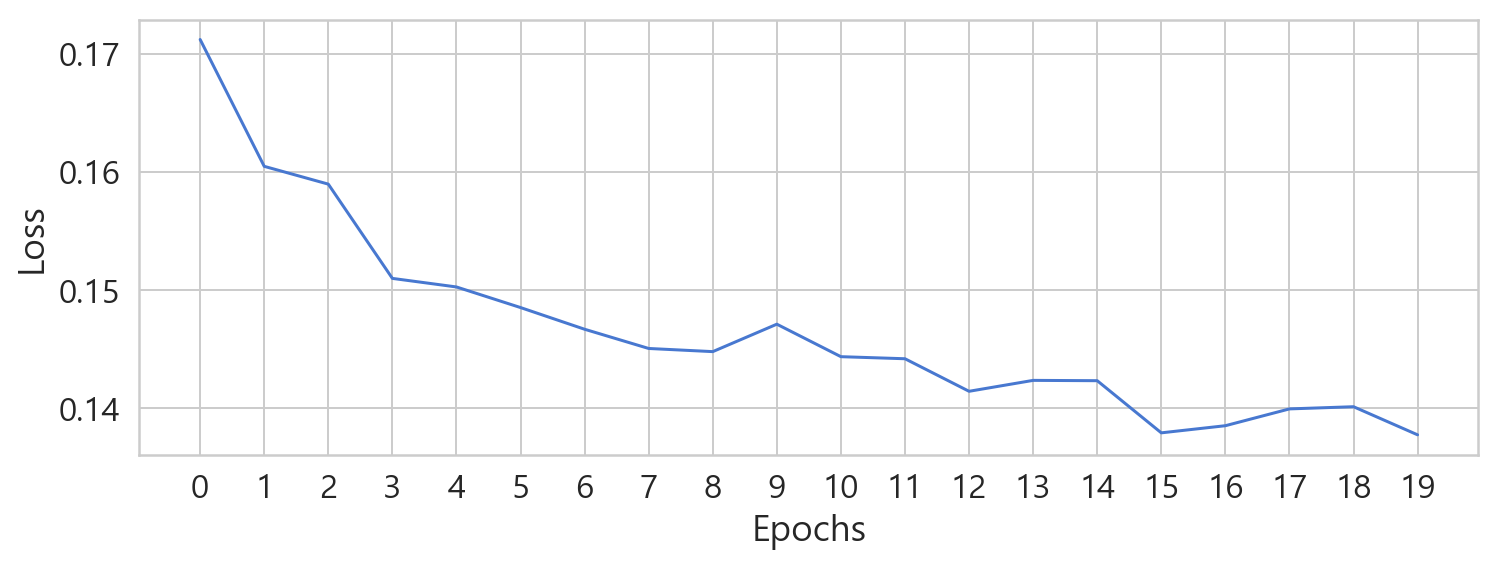

In [1132]:
losses_lstm = lstm_model.history.history['loss']
plt.figure(figsize=(12,4))
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.xticks(np.arange(0,21,1))
plt.plot(range(len(losses_lstm)),losses_lstm);

In [1133]:
lstm_predictions_scaled = list()

batch = scaled_train_data[-n_input:]
current_batch = batch.reshape((1, n_input, n_features))

for i in range(len(test_data)):   
    lstm_pred = lstm_model.predict(current_batch)[0]
    lstm_predictions_scaled.append(lstm_pred) 
    current_batch = np.append(current_batch[:,1:,:],[[lstm_pred]],axis=1)

In [1134]:
lstm_predictions_scaled

[array([0.7551394], dtype=float32),
 array([0.67633945], dtype=float32),
 array([0.6549065], dtype=float32),
 array([0.74729735], dtype=float32),
 array([0.62112486], dtype=float32),
 array([0.7443594], dtype=float32),
 array([0.6148045], dtype=float32),
 array([0.74559486], dtype=float32),
 array([0.6133294], dtype=float32),
 array([0.6322818], dtype=float32),
 array([0.63708615], dtype=float32),
 array([0.7510199], dtype=float32)]

In [1135]:
lstm_predictions = scaler.inverse_transform(lstm_predictions_scaled)
lstm_predictions

array([[1518.11435986],
       [1363.03603268],
       [1320.85601425],
       [1502.68117809],
       [1254.37373161],
       [1496.89924812],
       [1241.9352684 ],
       [1499.33068275],
       [1239.03227997],
       [1276.33054352],
       [1285.78554916],
       [1510.00715351]])

In [1136]:
test_data['LSTM_Predictions'] = lstm_predictions
test_data

,사용금액,ARIMA_Predictions,LSTM_Predictions
사용일자,,,
2019-02-13,2000,NaN,1518.114360
2019-02-14,1187,NaN,1363.036033
2019-02-15,1506,NaN,1320.856014
2019-02-17,1530,NaN,1502.681178
2019-02-18,32,NaN,1254.373732
2019-02-20,982,NaN,1496.899248
2019-02-22,856,NaN,1241.935268
2019-02-23,2000,NaN,1499.330683
2019-02-25,657,NaN,1239.032280


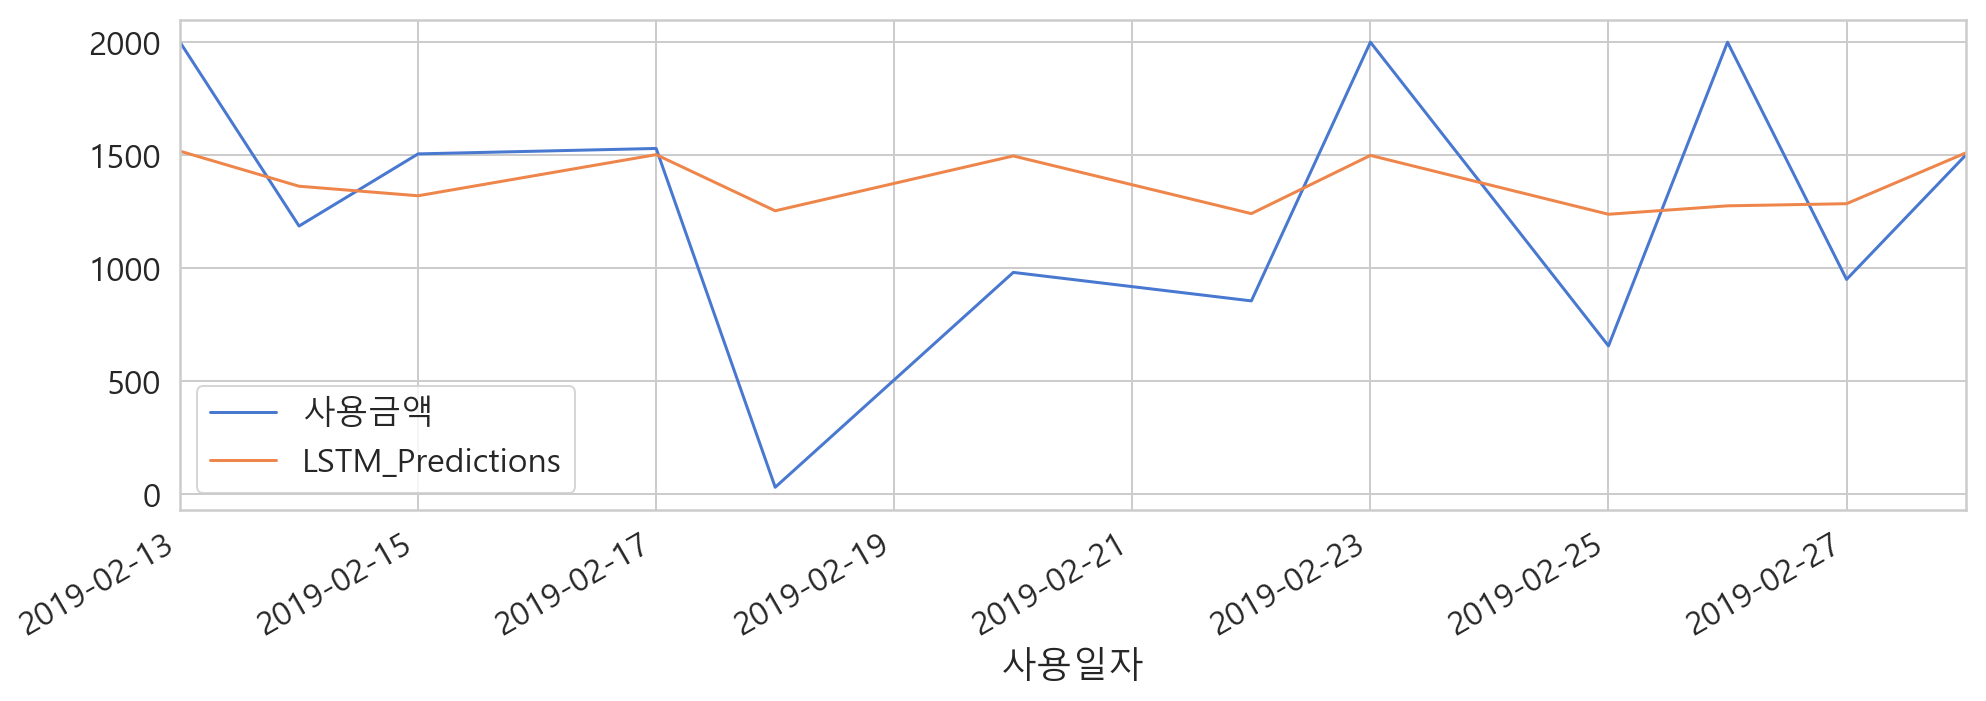

In [1137]:
test_data['사용금액'].plot(figsize = (16,5), legend=True)
test_data['LSTM_Predictions'].plot(legend = True);

In [1138]:
lstm_rmse_error = rmse(test_data['사용금액'], test_data["LSTM_Predictions"])
lstm_mse_error = lstm_rmse_error**2
mean_value = df['사용금액'].mean()

print(f'MSE Error: {lstm_mse_error}\nRMSE Error: {lstm_rmse_error}\nMean: {mean_value}')

MSE Error: 285983.51706421655
RMSE Error: 534.7742673915944
Mean: 1361.3127147766322


# Prophet Forecast


In [1189]:
df_pr = df.copy()
df_pr = df.reset_index()
df_pr.columns = ['ds','y']

In [1190]:
df_pr

,ds,y
0,2018-04-01,3188
1,2018-04-02,2433
2,2018-04-03,4615
3,2018-04-04,1154
4,2018-04-05,856
5,2018-04-06,2485
6,2018-04-07,27995
7,2018-04-08,32
8,2018-04-10,4919
9,2018-04-11,1292


In [1139]:
df_pr = df.copy()
df_pr = df.reset_index()
df_pr.columns = ['ds','y'] # To use prophet column names should be like that
train_data_pr = df_pr.iloc[:len(df)-12]
test_data_pr = df_pr.iloc[len(df)-12:]
from fbprophet import Prophet
m = Prophet()
m.fit(train_data_pr)
future = m.make_future_dataframe(periods=12,freq='MS')
prophet_pred = m.predict(future)
prophet_pred.tail()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
286,2019-10-01,1140.587386,136.163421,2003.872453,1140.277804,1140.897774,-59.003405,-59.003405,-59.003405,-59.003405,-59.003405,-59.003405,0.0,0.0,0.0,1081.583981
287,2019-11-01,1123.002376,98.858385,1902.585831,1122.629994,1123.389257,-137.299646,-137.299646,-137.299646,-137.299646,-137.299646,-137.299646,0.0,0.0,0.0,985.702729
288,2019-12-01,1105.984624,72.743770,1946.552809,1105.531914,1106.430930,-110.040850,-110.040850,-110.040850,-110.040850,-110.040850,-110.040850,0.0,0.0,0.0,995.943774
289,2020-01-01,1088.399614,172.156373,2014.437692,1087.863882,1088.909904,63.836879,63.836879,63.836879,63.836879,63.836879,63.836879,0.0,0.0,0.0,1152.236494
290,2020-02-01,1070.814604,440.304586,2191.424490,1070.208738,1071.409337,246.856110,246.856110,246.856110,246.856110,246.856110,246.856110,0.0,0.0,0.0,1317.670714


In [1140]:
prophet_pred = pd.DataFrame({"Date" : prophet_pred[-12:]['ds'], "Pred" : prophet_pred[-12:]["yhat"]})
prophet_pred = prophet_pred.set_index("Date")
prophet_pred.index.freq = "MS"
prophet_pred

,Pred
Date,
2019-03-01,1124.681033
2019-04-01,1355.332863
2019-05-01,1291.214797
2019-06-01,1456.649018
2019-07-01,1303.712350
2019-08-01,1059.903866
2019-09-01,1047.564287
2019-10-01,1081.583981
2019-11-01,985.702729


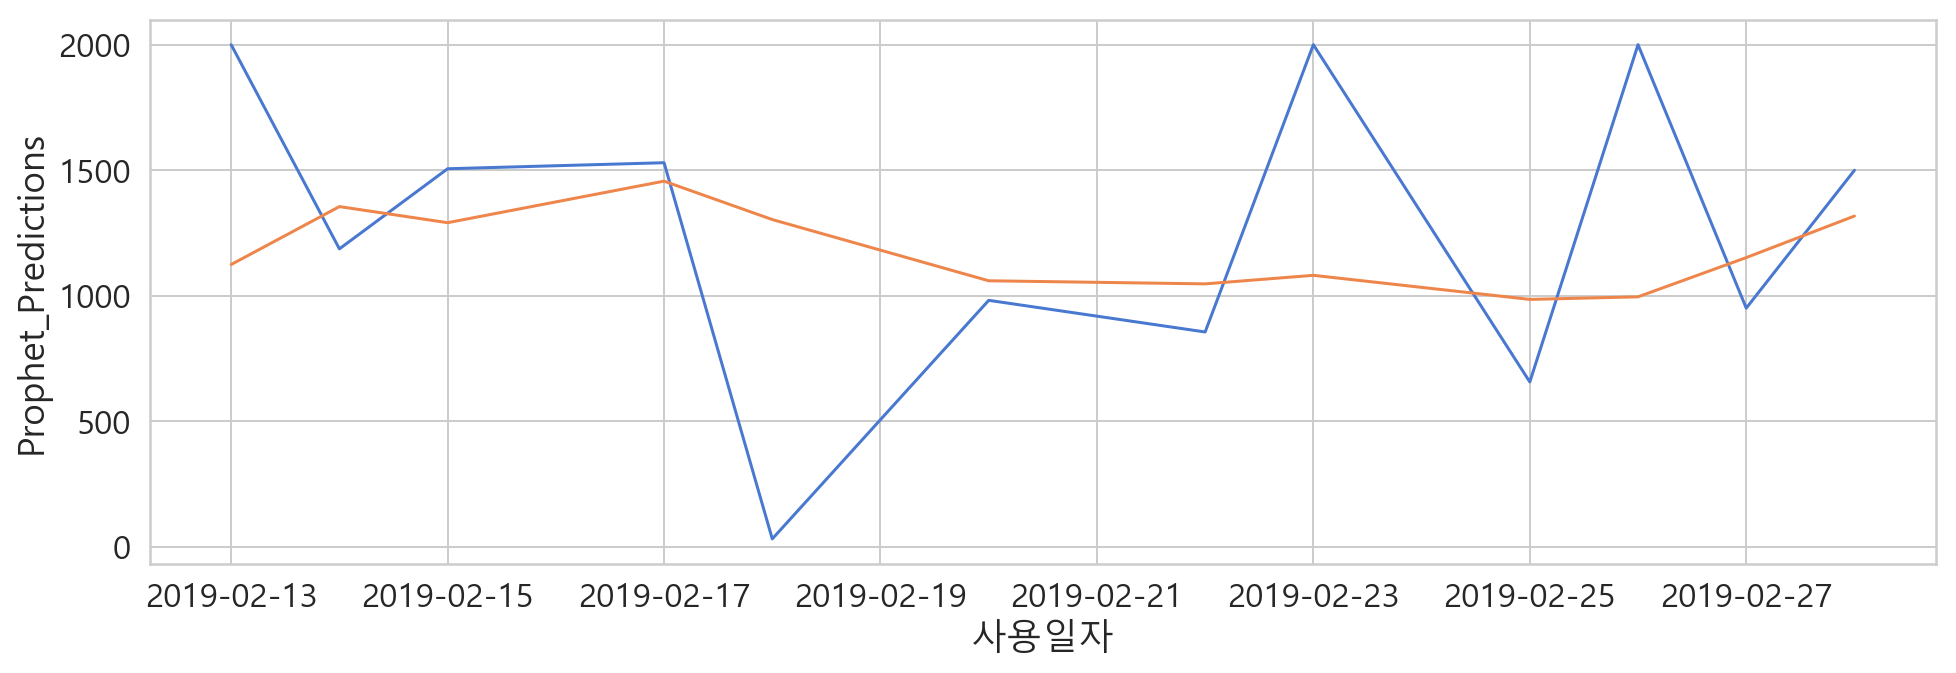

In [1141]:
test_data["Prophet_Predictions"] = prophet_pred['Pred'].values
import seaborn as sns
plt.figure(figsize=(16,5))
ax = sns.lineplot(x= test_data.index, y=test_data["사용금액"])
sns.lineplot(x=test_data.index, y = test_data["Prophet_Predictions"]);

In [1142]:
prophet_rmse_error = rmse(test_data['사용금액'], test_data["Prophet_Predictions"])
prophet_mse_error = prophet_rmse_error**2
mean_value = df['사용금액'].mean()

print(f'MSE Error: {prophet_mse_error}\nRMSE Error: {prophet_rmse_error}\nMean: {mean_value}')

MSE Error: 378287.74610060104
RMSE Error: 615.0510109743752
Mean: 1361.3127147766322


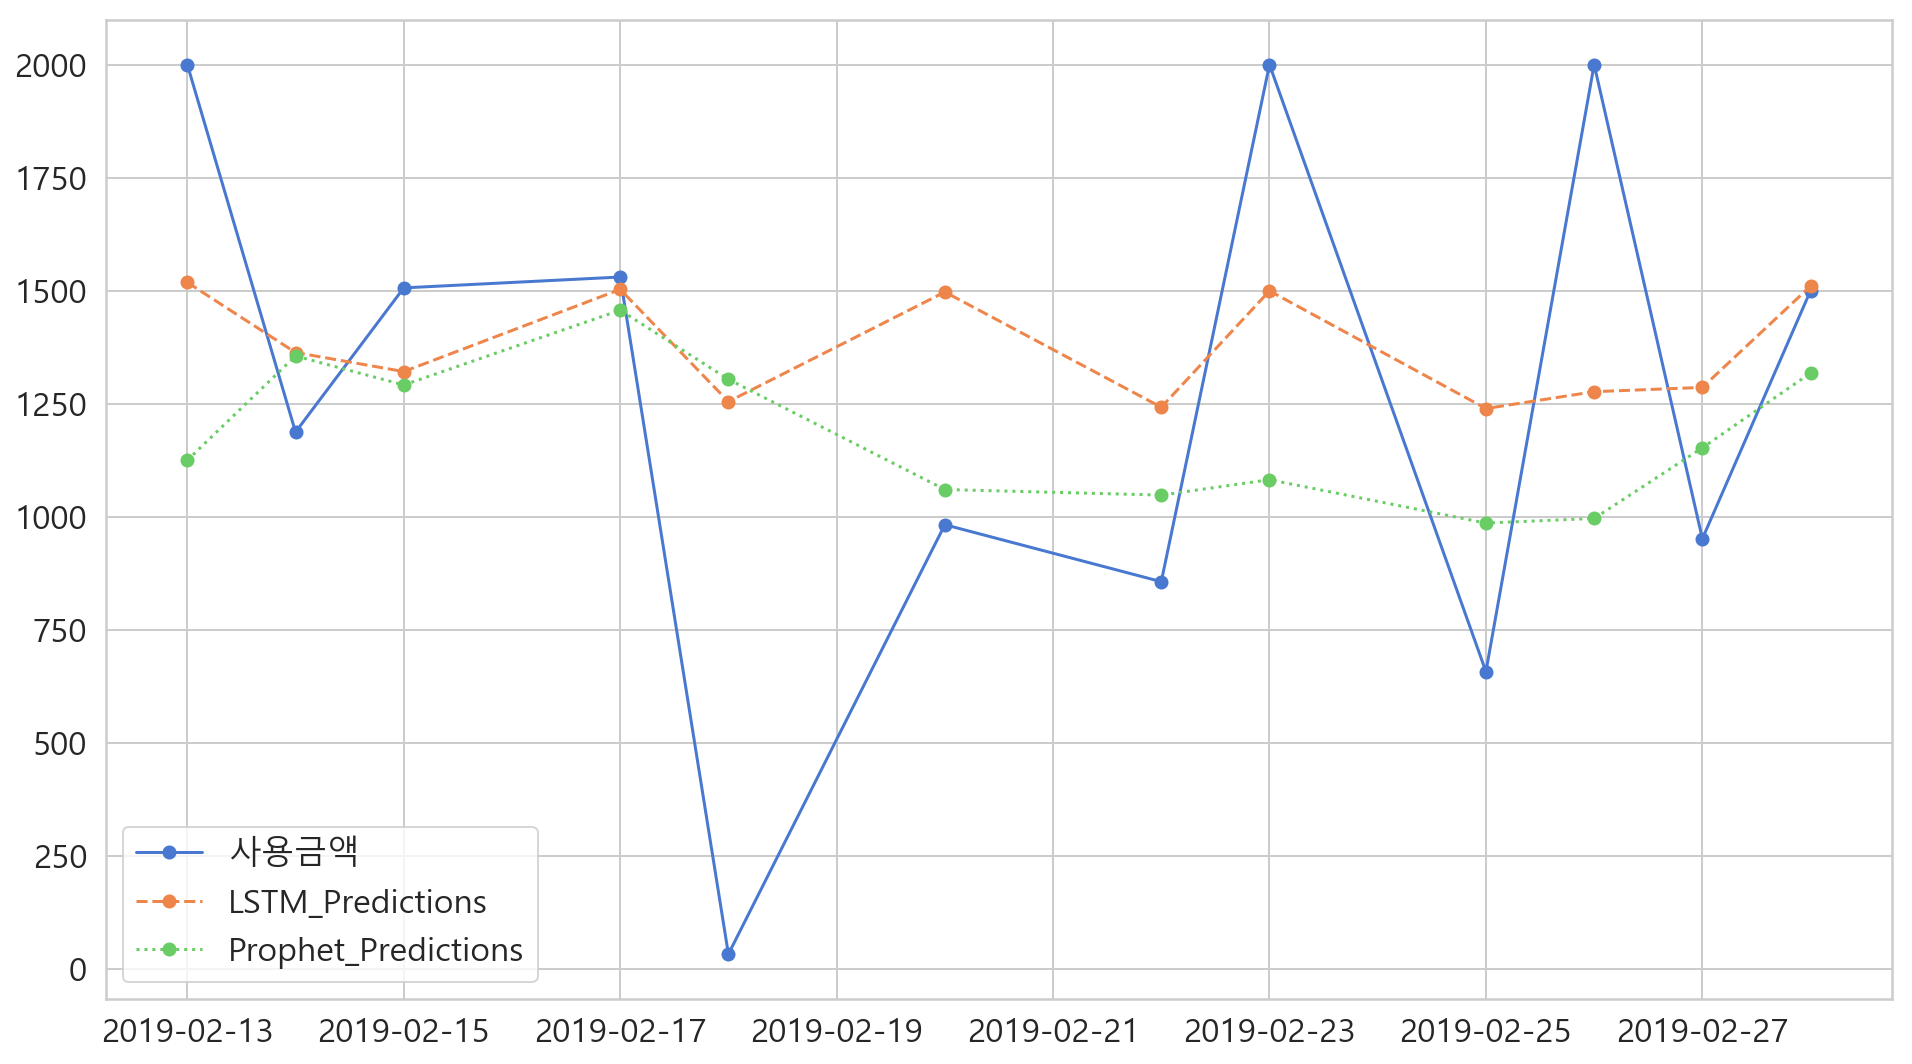

In [1191]:
rmse_errors = [arima_rmse_error, lstm_rmse_error, prophet_rmse_error]
mse_errors = [arima_mse_error, lstm_mse_error, prophet_mse_error]
errors = pd.DataFrame({"Models" : ["ARIMA", "LSTM", "Prophet"],"RMSE Errors" : rmse_errors, "MSE Errors" : mse_errors})
plt.figure(figsize=(16,9))
plt.plot_date(test_data.index, test_data["사용금액"], linestyle="-")
# plt.plot_date(test_data.index, test_data["ARIMA_Predictions"], linestyle="-.")
plt.plot_date(test_data.index, test_data["LSTM_Predictions"], linestyle="--")
plt.plot_date(test_data.index, test_data["Prophet_Predictions"], linestyle=":")
plt.legend()
plt.show()

In [1144]:
print(f"Mean: {test_data['사용금액'].mean()}")
errors

Mean: 1266.75


,Models,RMSE Errors,MSE Errors
0,ARIMA,608.459505,370222.969217
1,LSTM,534.774267,285983.517064
2,Prophet,615.051011,378287.746101


In [1145]:
test_data

,사용금액,ARIMA_Predictions,LSTM_Predictions,Prophet_Predictions
사용일자,,,,
2019-02-13,2000,NaN,1518.114360,1124.681033
2019-02-14,1187,NaN,1363.036033,1355.332863
2019-02-15,1506,NaN,1320.856014,1291.214797
2019-02-17,1530,NaN,1502.681178,1456.649018
2019-02-18,32,NaN,1254.373732,1303.712350
2019-02-20,982,NaN,1496.899248,1059.903866
2019-02-22,856,NaN,1241.935268,1047.564287
2019-02-23,2000,NaN,1499.330683,1081.583981
2019-02-25,657,NaN,1239.032280,985.702729
